In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})
from mpl_toolkits.basemap import Basemap
from utils import *

from sklearn.linear_model import Ridge

In [2]:
nlat = 48
nlon = 96
N = 120
Nk = 5

lat = np.load('lat.npy')
lon = np.load('lon.npy')
land = np.load('land.npy')

lons, lats = np.meshgrid(lon, lat)

In [3]:
dA = compute_patch_area()
bij = plotting_blocks()

dX, dFg, dF, std, dFs = read_data() 

K = compute_kernel(dX, dFg)
Km = compute_da_dT(dX)



/tmp/ipykernel_1970306/3196807943.py:17: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  CT=map.pcolormesh(lons,lats,tdFr,latlon=True,cmap=plt.cm.RdBu_r,vmin=-7,vmax=7, ax=axs[0])
/tmp/ipykernel_1970306/3196807943.py:24: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  CT=map.pcolormesh(lons,lats,tdF[0,],cmap=plt.cm.RdBu_r,latlon=True,vmin=-7,vmax=7, ax=axs[1])


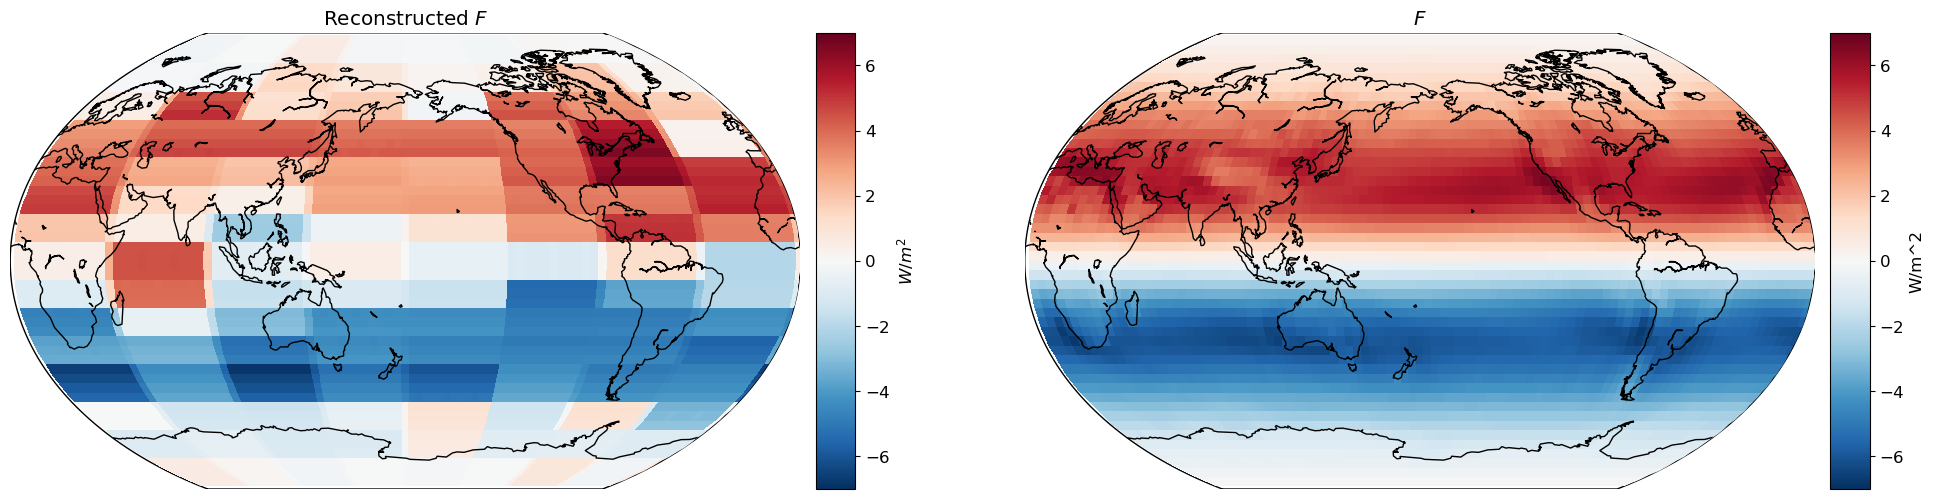

In [4]:
tdX, tdF = read_testdata_dipole(std, dF) #Test data

Nm = 50
fMSE = np.zeros([Nm])

tdFg = project_to_basis(tdF,dF,dFs)

Kp = get_Kp(Nm, K)
rtdFg = np.matmul(Kp,tdX)

tdFr = recon_from_basis(rtdFg,dF,dFs)
    
fig, axs = plt.subplots(1,2, figsize=(24,9))

map = Basemap(llcrnrlon=0,llcrnrlat=-87.5,urcrnrlon=360,urcrnrlat=87.5,projection='kav7',lon_0=-180, ax=axs[0])
map.drawcoastlines()
CT=map.pcolormesh(lons,lats,tdFr,latlon=True,cmap=plt.cm.RdBu_r,vmin=-7,vmax=7, ax=axs[0])
cbar = map.colorbar(CT)
cbar.ax.set_ylabel(r'$W/m^2$')
axs[0].set_title(r'Reconstructed $F$')

map = Basemap(llcrnrlon=0,llcrnrlat=-87.5,urcrnrlon=360,urcrnrlat=87.5,projection='kav7',lon_0=-180, ax=axs[1])
map.drawcoastlines()
CT=map.pcolormesh(lons,lats,tdF[0,],cmap=plt.cm.RdBu_r,latlon=True,vmin=-7,vmax=7, ax=axs[1])  
cbar = map.colorbar(CT)
cbar.ax.set_ylabel(r'W/m^2')
axs[1].set_title(r'$F$')

plt.savefig('Freconstruction_dipole.png',dpi=300,bbox_inches="tight")

plt.show()

/tmp/ipykernel_1970306/2040424123.py:14: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  CT=map.pcolormesh(lons,lats,tdR[0,],latlon=True,cmap=plt.cm.seismic,vmin=-5,vmax=5, ax=axs[0,0])
/tmp/ipykernel_1970306/2040424123.py:21: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  CT=map.pcolormesh(lons,lats,tdT[0,],cmap=plt.cm.seismic,latlon=True,vmin=-5,vmax=5, ax=axs[0,1])
/tmp/ipykernel_1970306/2040424123.py:28: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell 

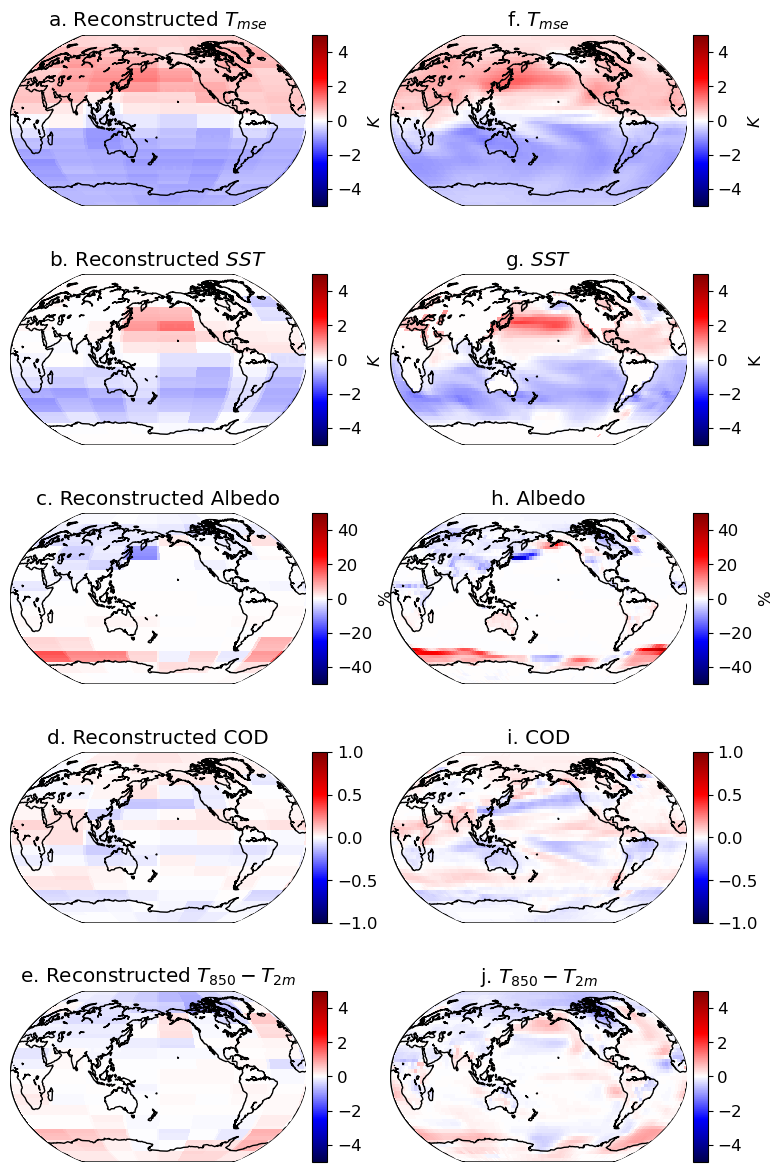

In [5]:

tdT, tdalb, tdTo, tdcod, tdla = read_responses_test_dipole()

Kp = get_Kp(-Nm, K)
tdXg = np.matmul(np.linalg.pinv(Kp),tdFg)
tdR = np.zeros((Nk,nlat,nlon))

for k in range(Nk):
    tdR[k,] = recon_from_basis(tdXg[k*120:(k+1)*120,],dF,std[k])

fig, axs = plt.subplots(5,2, figsize=(9,15))

map = Basemap(llcrnrlon=0,llcrnrlat=-87.5,urcrnrlon=360,urcrnrlat=87.5,projection='kav7',lon_0=-180, ax=axs[0,0])
map.drawcoastlines()
CT=map.pcolormesh(lons,lats,tdR[0,],latlon=True,cmap=plt.cm.seismic,vmin=-5,vmax=5, ax=axs[0,0])
cbar = map.colorbar(CT)
cbar.ax.set_ylabel(r'$K$')
axs[0,0].set_title(r'a. Reconstructed $T_{mse}$')

map = Basemap(llcrnrlon=0,llcrnrlat=-87.5,urcrnrlon=360,urcrnrlat=87.5,projection='kav7',lon_0=-180, ax=axs[0,1])
map.drawcoastlines()
CT=map.pcolormesh(lons,lats,tdT[0,],cmap=plt.cm.seismic,latlon=True,vmin=-5,vmax=5, ax=axs[0,1])  
cbar = map.colorbar(CT)
cbar.ax.set_ylabel(r'$K$')
axs[0,1].set_title(r'f. $T_{mse}$')

map = Basemap(llcrnrlon=0,llcrnrlat=-87.5,urcrnrlon=360,urcrnrlat=87.5,projection='kav7',lon_0=-180, ax=axs[1,0])
map.drawcoastlines()
CT=map.pcolormesh(lons,lats,tdR[1,],latlon=True,cmap=plt.cm.seismic,vmin=-5,vmax=5, ax=axs[1,0])
cbar = map.colorbar(CT)
cbar.ax.set_ylabel(r'$K$')
axs[1,0].set_title(r'b. Reconstructed $SST$')

map = Basemap(llcrnrlon=0,llcrnrlat=-87.5,urcrnrlon=360,urcrnrlat=87.5,projection='kav7',lon_0=-180, ax=axs[1,1])
map.drawcoastlines()
CT=map.pcolormesh(lons,lats,tdTo[0,],cmap=plt.cm.seismic,latlon=True,vmin=-5,vmax=5, ax=axs[1,1])  
cbar = map.colorbar(CT)
cbar.ax.set_ylabel(r'K')
axs[1,1].set_title(r'g. $SST$')

map = Basemap(llcrnrlon=0,llcrnrlat=-87.5,urcrnrlon=360,urcrnrlat=87.5,projection='kav7',lon_0=-180, ax=axs[2,0])
map.drawcoastlines()
CT=map.pcolormesh(lons,lats,tdR[2,],latlon=True,cmap=plt.cm.seismic,vmin=-50,vmax=50, ax=axs[2,0])
cbar = map.colorbar(CT)
cbar.ax.set_ylabel(r'$\%$')
axs[2,0].set_title(r'c. Reconstructed Albedo')

map = Basemap(llcrnrlon=0,llcrnrlat=-87.5,urcrnrlon=360,urcrnrlat=87.5,projection='kav7',lon_0=-180, ax=axs[2,1])
map.drawcoastlines()
CT=map.pcolormesh(lons,lats,tdalb[0,],cmap=plt.cm.seismic,latlon=True,vmin=-50,vmax=50, ax=axs[2,1])  
cbar = map.colorbar(CT)
cbar.ax.set_ylabel(r'$\%$')
axs[2,1].set_title(r'h. Albedo')

map = Basemap(llcrnrlon=0,llcrnrlat=-87.5,urcrnrlon=360,urcrnrlat=87.5,projection='kav7',lon_0=-180, ax=axs[3,0])
map.drawcoastlines()
CT=map.pcolormesh(lons,lats,tdR[3,],latlon=True,cmap=plt.cm.seismic,vmin=-1,vmax=1, ax=axs[3,0])
cbar = map.colorbar(CT)
cbar.ax.set_ylabel(r'')
axs[3,0].set_title(r'd. Reconstructed COD')

map = Basemap(llcrnrlon=0,llcrnrlat=-87.5,urcrnrlon=360,urcrnrlat=87.5,projection='kav7',lon_0=-180, ax=axs[3,1])
map.drawcoastlines()
CT=map.pcolormesh(lons,lats,tdcod[0,],cmap=plt.cm.seismic,latlon=True,vmin=-1,vmax=1, ax=axs[3,1])  
cbar = map.colorbar(CT)
cbar.ax.set_ylabel(r'')
axs[3,1].set_title(r'i. COD')

map = Basemap(llcrnrlon=0,llcrnrlat=-87.5,urcrnrlon=360,urcrnrlat=87.5,projection='kav7',lon_0=-180, ax=axs[4,0])
map.drawcoastlines()
CT=map.pcolormesh(lons,lats,tdR[4,],latlon=True,cmap=plt.cm.seismic,vmin=-5,vmax=5, ax=axs[4,0])
cbar = map.colorbar(CT)
cbar.ax.set_ylabel(r'')
axs[4,0].set_title(r'e. Reconstructed $T_{850}-T_{2m}$')

map = Basemap(llcrnrlon=0,llcrnrlat=-87.5,urcrnrlon=360,urcrnrlat=87.5,projection='kav7',lon_0=-180, ax=axs[4,1])
map.drawcoastlines()
CT=map.pcolormesh(lons,lats,tdla[0,],cmap=plt.cm.seismic,latlon=True,vmin=-5,vmax=5, ax=axs[4,1])  
cbar = map.colorbar(CT)
cbar.ax.set_ylabel(r'')
axs[4,1].set_title(r'j. $T_{850}-T_{2m}$')



plt.savefig('Rreconstruction_dipole.pdf',bbox_inches="tight",format='pdf')

plt.show()

In [6]:
tdTg= project_to_basis(tdT,dF,std[0])
rtdX = np.zeros((5,120,1))
tdR = np.zeros((5,48,96))

rtdX[0,] = tdTg
for kk in range(1,5):
    rtdX[kk,] = np.matmul(Km[kk,],tdTg)
   
    for j in range(N):
        tdR[kk,] = tdR[kk,] + rtdX[kk,j,]*dF[j,:,:]
        
rtdX = np.reshape(rtdX,(Nk*N,1))   

tdX = rtdX

Fk = np.zeros((Nk,nlat,nlon))
lam = np.zeros((Nk))

for k in range(Nk):
    tdFg = np.matmul(Kp[:,k*120:(k+1)*120],tdX[k*120:(k+1)*120,])

    Fk[k,] = -recon_from_basis(tdFg,dF,dFs)
    lam[k] = np.sum(Fk[k,].reshape(4608)*dA.reshape(4608))/(np.sum(dA))
    
rtdFg = np.matmul(Kp,tdX)

tdFr = recon_from_basis(rtdFg,dF,dFs)
    

lamF = np.sum(tdF.reshape(4608)*dA.reshape(4608))/(np.sum(dA))

lamFr = np.sum(tdFr.reshape(4608)*dA.reshape(4608))/(np.sum(dA))


/tmp/ipykernel_1970306/3586678888.py:5: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  CT=map.pcolormesh(lons,lats,tdFr,latlon=True,cmap=plt.cm.RdBu_r,vmin=-8,vmax=8,ax=axs[1,0])
/tmp/ipykernel_1970306/3586678888.py:19: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  CT=map.pcolormesh(lons,lats,tdF[0,],latlon=True,cmap=plt.cm.RdBu_r,vmin=-8,vmax=8,ax=axs[0,0])


2.5984664759606515 16.50435739220948 0.15744123895348996


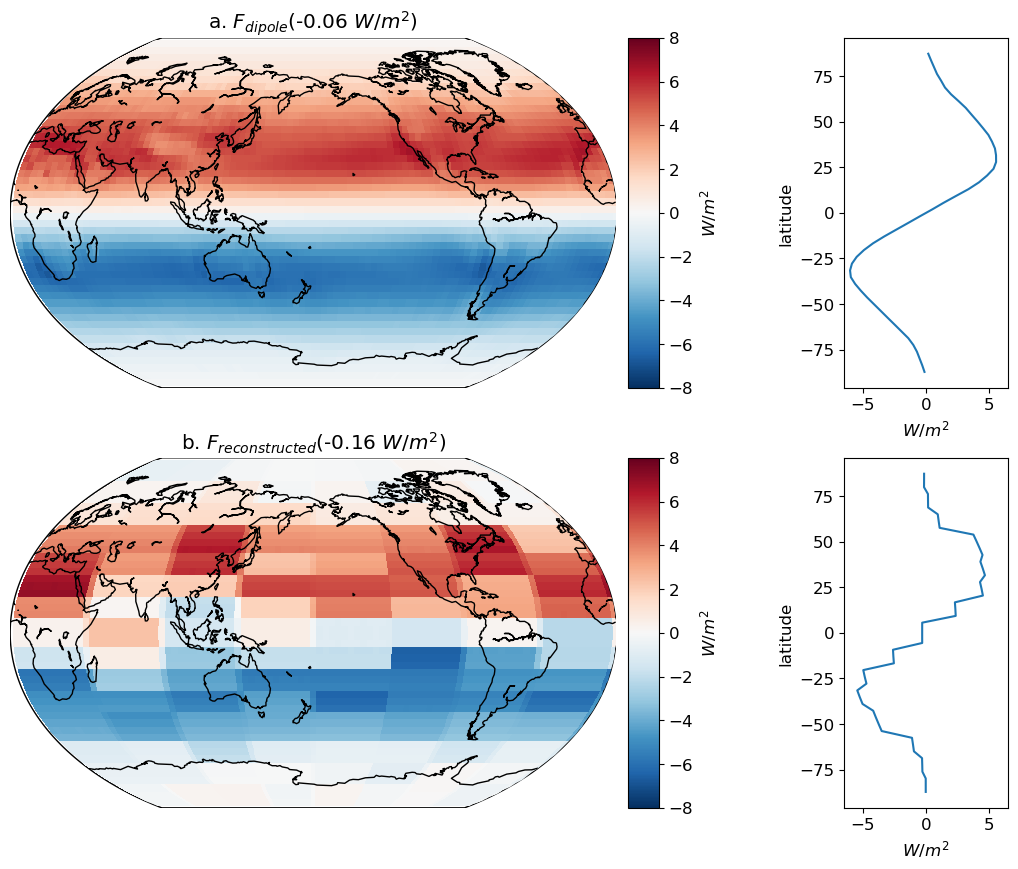

In [7]:
fig, axs = plt.subplots(2,2, figsize=(14,10), width_ratios=[5, 1.])

map = Basemap(llcrnrlon=0,llcrnrlat=-87.5,urcrnrlon=360,urcrnrlat=87.5,projection='kav7',lon_0=-180,ax=axs[1,0])
map.drawcoastlines()
CT=map.pcolormesh(lons,lats,tdFr,latlon=True,cmap=plt.cm.RdBu_r,vmin=-8,vmax=8,ax=axs[1,0])
cbar = map.colorbar(CT)
cbar.ax.set_ylabel(r'$W/m^2$')
axs[1,0].set_title(r'b. $F_{reconstructed}$('+f'{lamFr:.2f}'+' $W/m^2$)')

w=np.sum(dA,axis=0)
Fk_zonal = np.average(tdFr,weights=w,axis=1)
axs[1,1].plot(Fk_zonal,lats[:,0])
axs[1,1].set_ylabel('latitude')
axs[1,1].set_xlabel('$W/m^2$')
axs[1,1].set_xlim((-6.5,6.5))

map = Basemap(llcrnrlon=0,llcrnrlat=-87.5,urcrnrlon=360,urcrnrlat=87.5,projection='kav7',lon_0=-180,ax=axs[0,0])
map.drawcoastlines()
CT=map.pcolormesh(lons,lats,tdF[0,],latlon=True,cmap=plt.cm.RdBu_r,vmin=-8,vmax=8,ax=axs[0,0])
cbar = map.colorbar(CT)
cbar.ax.set_ylabel(r'$W/m^2$')
axs[0,0].set_title(r'a. $F_{dipole}$('+f'{lamF:.2f}'+' $W/m^2$)')

w=np.sum(dA,axis=0)
Fk_zonal = np.average(tdF[0],weights=w,axis=1)
axs[0,1].plot(Fk_zonal,lats[:,0])
axs[0,1].set_ylabel('latitude')
axs[0,1].set_xlabel('$W/m^2$')
axs[0,1].set_xlim((-6.5,6.5))

plt.savefig('dipole_zonal'+'.pdf',bbox_inches="tight",format='pdf')

fMSE=  np.average((tdFr-tdF[0])**2,weights=dA) #- np.average((tdFr-tdF[0,]),weights=dA)**2

ss_tot = np.average((tdF[0])**2,weights=dA) #- np.average((tdF[0]),weights=dA)**2
    
print(fMSE,ss_tot, fMSE/ss_tot)


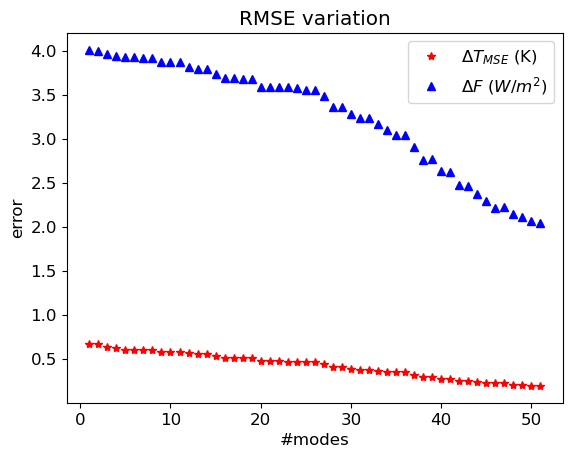

In [8]:
#tdX, tdF = read_testdata(std, dF) #Test data

Nm = 51
fMSE = np.zeros([Nm])

tdFg = project_to_basis(tdF,dF,dFs)
tdFo = recon_from_basis(tdFg,dF,dFs)

K = compute_kernel(dX, dFg)
    
for p in np.arange(-1,-Nm-1,-1):
    Kp = get_Kp(-p, K)
    rtdFg = np.matmul(Kp,tdX)

    tdFr = recon_from_basis(rtdFg,dF,dFs)
    fMSE[-p-1]=  np.sqrt(np.average((tdFr-tdFo)**2,weights=dA))
    
k=0
tdT=np.load('ddmsegz.npy')
MSE = np.zeros([Nm])

for p in np.arange(-1,-Nm-1,-1):
    Kp = get_Kp(-p, K)

    tdXp = np.matmul(np.linalg.pinv(Kp),tdFg)

    tdR = recon_from_basis(tdXp[k*120:(k+1)*120,],dF,std[k])
    
    MSE[-p-1]=  np.sqrt(np.average((tdT[0,:,:]-tdR)**2,weights=dA))
    
    
plt.plot(np.arange(1,Nm+1),MSE,'r*',label=r'$\Delta T_{MSE}$ (K)')     
plt.plot(np.arange(1,Nm+1),fMSE,'b^',label=r'$\Delta F$ $(W/m^2)$')
plt.title('RMSE variation')
plt.ylabel(r'error')
plt.legend()
plt.xlabel(r'#modes')
plt.savefig('Fmse_lam.png',dpi=300,bbox_inches="tight")
plt.show()

In [9]:
print(np.min(fMSE))
print(np.min(MSE))

print(np.average((tdT[0])**2,weights=dA))
print(np.min(MSE**2)/np.average((tdT[0])**2,weights=dA))

2.048819905172639
0.19763624658676307
0.4503408600149699
0.08673449254328246


In [10]:
#tdX, tdF = read_testdata(std, dF) #Test data

Nm = 51

tdFg = project_to_basis(tdF,dF,dFs)
tdFo = recon_from_basis(tdFg,dF,dFs)

K = compute_kernel(dX, dFg)

p = -Nm

Kp = get_Kp(-p, K)
rtdFg = np.matmul(Kp,tdX)

tdFr = recon_from_basis(rtdFg,dF,dFs)

fMSE=  np.average((tdFr-tdF[0])**2,weights=dA) - np.average((tdFr-tdF[0]),weights=dA)**2

ss_tot = np.average((tdF[0])**2,weights=dA) - np.average((tdF[0]),weights=dA)**2
    
print(fMSE,ss_tot, fMSE/ss_tot)



4.55735956215334 16.500831587763408 0.276189690071921


In [11]:
#Pattern correlation

tdT, tdalb, tdTo, tdcod, tdla = read_responses_test()
cdT, cdalb, cdTo, cdcod, cdla = read_responses_test_2xCO2()

tdx, cdx = tdT, cdT


print(np.mean(tdx*cdx)/np.sqrt(np.mean(tdx**2)*np.mean(cdx**2)))
print(np.mean(cdx)/np.mean(tdx))


0.9953189710357815
0.9877729413388837
